In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
sns.set_context("talk")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
plt.rcParams.update({'font.size': 22})
plt.rcParams['svg.fonttype'] = 'none'


In [3]:
data = []

# Full T20

In [84]:
Hum_Full_T20 = pd.read_csv("full/blastp_processed_full_hum.csv")['% Identity']
Mus_Full_T20 = pd.read_csv("full/blastp_processed_full_mus.csv")['% Identity']
Nb_Full_T20 = pd.read_csv("full/blastp_processed_full_nb.csv")['% Identity']
data.append(('Full VH',
            [('Human',Hum_Full_T20),
            ('Nanobodies',Nb_Full_T20),
             ('Murine',Mus_Full_T20),])
           )

In [75]:
Nb_Full_T20.shape

(49686,)

# FR T20

In [4]:
Hum_FR_T20 = pd.read_csv("FR/blastp_processed_FR_hum.csv")['% Identity']
Mus_FR_T20 = pd.read_csv("FR/blastp_processed_FR_mus.csv")['% Identity']
Nb_FR_T20 = pd.read_csv("FR/blastp_processed_FR_nb.csv")['% Identity']
data.append(('FR',
            [('Human',Hum_FR_T20),
            ('Nanobodies',Nb_FR_T20),
             ('Murine',Mus_FR_T20),])
           )

In [5]:
stats.ttest_ind(Hum_FR_T20, Nb_FR_T20,equal_var=False)

Ttest_indResult(statistic=308.9775039958466, pvalue=0.0)

In [6]:
stats.ttest_ind(Nb_FR_T20, Mus_FR_T20,equal_var=False)

Ttest_indResult(statistic=64.84721266964485, pvalue=0.0)

In [8]:
Hum_FR_T20.std()

4.588019456231951

In [9]:
Mus_FR_T20.std()

4.228872974232188

In [10]:
Nb_FR_T20.std()

3.7351457963705252

# FR1 T20

In [86]:
Hum_FR1_T20 = pd.read_csv("FR1/blastp_processed_FR1_hum.csv")['% Identity']
Mus_FR1_T20 = pd.read_csv("FR1/blastp_processed_FR1_mus.csv")['% Identity']
Nb_FR1_T20 = pd.read_csv("FR1/blastp_processed_FR1_nb.csv")['% Identity']
data.append(('FR1',
            [('Human',Hum_FR1_T20),
            ('Nanobodies',Nb_FR1_T20),
            ('Murine',Mus_FR1_T20),])
           )

# FR2 T20

In [87]:
Hum_FR2_T20 = pd.read_csv("FR2/blastp_processed_FR2_hum.csv")['% Identity']
Mus_FR2_T20 = pd.read_csv("FR2/blastp_processed_FR2_mus.csv")['% Identity']
Nb_FR2_T20 = pd.read_csv("FR2/blastp_processed_FR2_nb.csv")['% Identity']
data.append(('FR2',
            [('Human',Hum_FR2_T20),
            ('Nanobodies',Nb_FR2_T20),
             ('Murine',Mus_FR2_T20),])
           )

# FR3 T20

In [88]:
Hum_FR3_T20 = pd.read_csv("FR3/blastp_processed_FR3_hum.csv")['% Identity']
Mus_FR3_T20 = pd.read_csv("FR3/blastp_processed_FR3_mus.csv")['% Identity']
Nb_FR3_T20 = pd.read_csv("FR3/blastp_processed_FR3_nb.csv")['% Identity']
data.append(('FR3',
            [('Human',Hum_FR3_T20),
            ('Nanobodies',Nb_FR3_T20),
            ('Murine',Mus_FR3_T20),])
           )

# FR4 T20

In [89]:
Hum_FR4_T20 = pd.read_csv("FR4/blastp_processed_FR4_hum.csv")['% Identity']
Mus_FR4_T20 = pd.read_csv("FR4/blastp_processed_FR4_mus.csv")['% Identity']
Nb_FR4_T20 = pd.read_csv("FR4/blastp_processed_FR4_nb.csv")['% Identity']
data.append(('FR4',
            [('Human',Hum_FR4_T20),
            ('Nanobodies',Nb_FR4_T20),
            ('Murine',Mus_FR4_T20)])
           )

# Plot

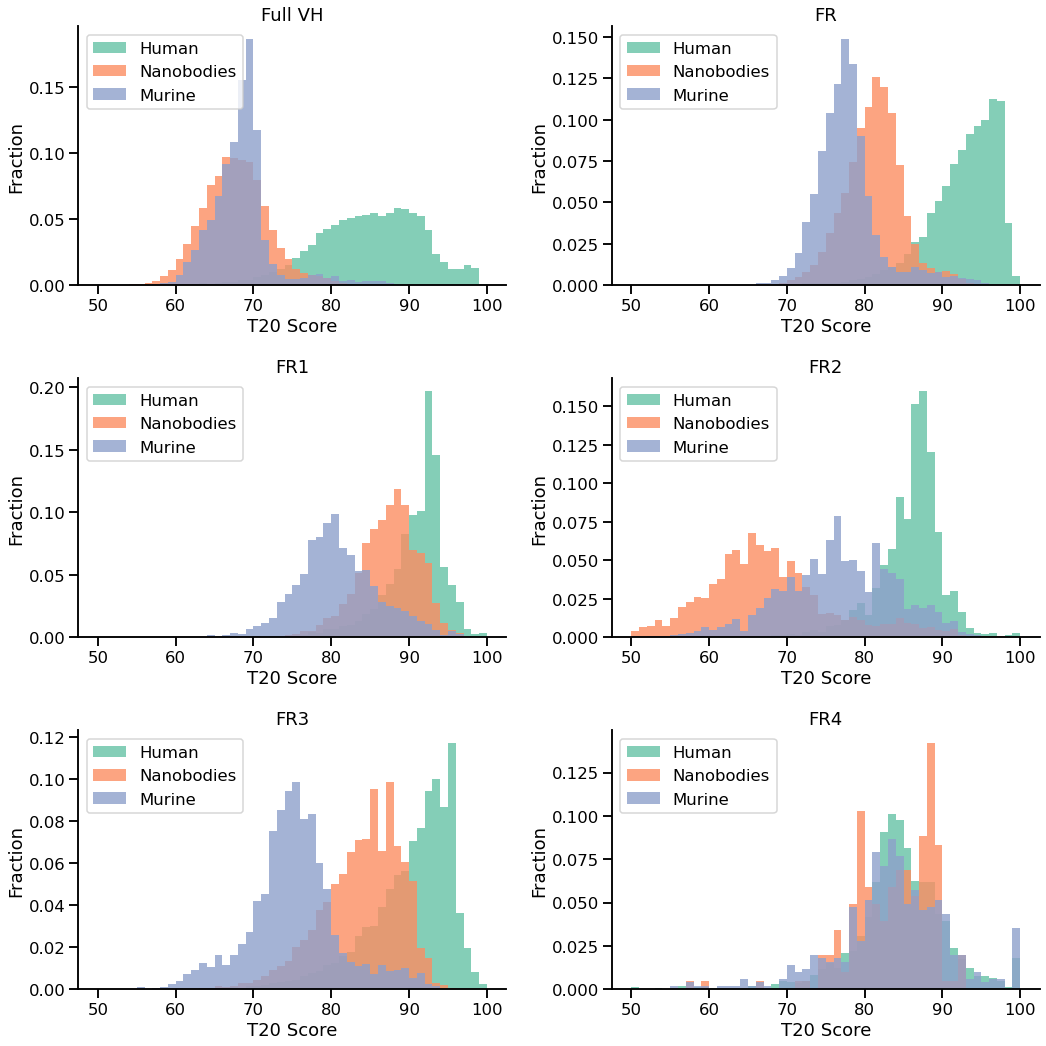

In [91]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
for ix,axis in enumerate(np.ravel(axs)):
    seq_type, identities = data[ix]
    for species,identity in identities:
        axis.hist(identity,bins=np.arange(50,101,1),
                 alpha=0.8,
                 weights = np.ones(identity.shape[0])/identity.shape[0],
                 label=species)
    axis.set_title(seq_type)
    axis.set_xlabel("T20 Score")
    axis.set_ylabel("Fraction")
    sns.despine()
    axis.legend(loc="upper left")
fig.tight_layout()
plt.savefig("Figure1.svg",dpi=300)
        